In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
test = X_test

In [4]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
X_train = X_train/255.
X_test = X_test/255.

In [6]:
class check_accuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if logs.get('accuracy')>=0.998:
            print("Hey got 99.8 accuracy so stopping!")
            self.model.stop_training=True
            
callback = check_accuracy()

In [11]:
model = keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,epochs=20,callbacks=[callback])

Epoch 1/20
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1668 - accuracy: 0.9506
Epoch 2/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0588 - accuracy: 0.9813
Epoch 3/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0361 - accuracy: 0.9885
Epoch 4/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0247 - accuracy: 0.9922
Epoch 5/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0167 - accuracy: 0.9943
Epoch 6/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 7/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0128 - accuracy: 0.9956
Epoch 8/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0099 - accuracy: 0.9966
Epoch 9/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 10/20
1875/1875 [==============================] - 52s 28m

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.1304 - accuracy: 0.9827


[0.13044828176498413, 0.982699990272522]

In [17]:
model.save('model_digit.h5')

In [18]:
pred=model.predict(X_test)

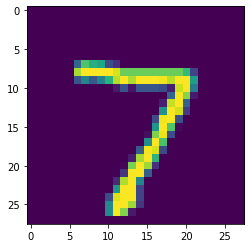

7


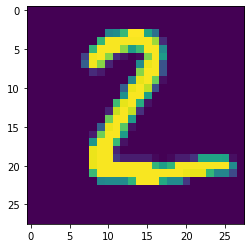

2


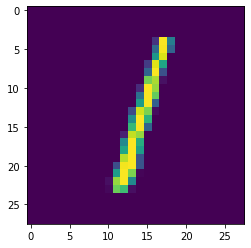

1


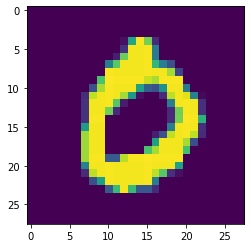

0


In [19]:
for i in range(4):
    plt.imshow(test[i])
    plt.show()
    print(y_test[i])


In [170]:
from PIL import Image,ImageOps

In [96]:
def predict(img1):
    prediction=model.predict(img1)
    
    percentage = max(prediction[0])*100
    print(prediction)
    print(f"Iam {percentage:.2f}% sure that its a {prediction[0].argmax()}")
    

## This below function is directly coded in app.py go there to see how it works


The preprocessing step is very important because if we directly resize and just predict we would get very low accuracy
so follow these below steps-
1- convert it into gray scale using .convert("L")
2- invert the image so to get digit in white and background as black
3- reduce the quality or i should say resizing and resampling using Image.BILINEAR
4- then resizing it to (1,28,28,1) as the training happens on the images of shape (60000,28,28,1) 
    --> here 60000 is number of trainning sample images
    --> so for 1 trainining sample of image (1,28,28,1)
5- Normalize the image by dividing 255 elementally.

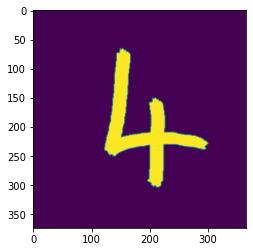

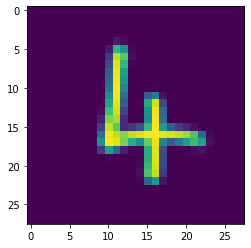

In [178]:
img = Image.open("41.png") .convert("L")
img = ImageOps.invert(img)
img = img.resize((28,28),resample=Image.BILINEAR)
plt.imshow(img)
plt.show()
img =np.resize(img,(1,28,28,1))
img = np.array(img)
img =img/255

In [179]:

predict(img)

[[4.6296285e-16 4.5523104e-12 1.1618791e-11 1.5743812e-18 9.9999881e-01
  2.3967978e-10 1.2021575e-06 7.9028224e-18 4.5233863e-15 1.0938671e-10]]
Iam 100.00% sure that its a 4


In [152]:
M = tf.keras.models.load_model('model_digit.h5')

In [153]:
np.argmax(M.predict(X_test[7].reshape(1,28,28,1)))

9

In [154]:
np.argmax(M.predict(img))

0